# Single Parameter estimation

In [51]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from numba import jit
import warnings
# warnings.filterwarnings('ignore')


In [154]:
def likelihood(n, p, r):
    return (p**r) * (1-p)**(n-r)
def posteriorbeta(n, p, r, alpha = 10, beta =10):
    return (p**r) * ((1-p)**(n-r)) * (p**(alpha - 1))* ((1-p)**(beta-1))
def E(x, p):
    expect = 0 
    for i in range(0,len(p)):
        expect += x[i]*p[i]
    return expect

In [155]:
n = 20
r = np.arange(0,n+2,2)
x = np.linspace(0,1,1000)
ll = np.zeros((len(r),1000))
llmax = np.zeros(len(r))
llmean = np.zeros(len(r))
llmeanb = np.zeros(len(r))

llb = np.zeros((len(r), 1000))
for i in range(0, len(r)):
    ll[i] = likelihood(n, x, r[i])
    llb[i] = posteriorbeta(n, x, r[i])
    Nb = sum(llb[i])/1000
    N = sum(ll[i])/1000
    ll[i] = ll[i]/N
    llb[i] = llb[i]/Nb
    # print(N)
    # print(sum(ll[i]))
    llmax[i] = np.where(ll[i] == max(ll[i]))[0]
    llmean[i] = E(x,ll[i])/1000
    llmeanb[i] = E(x,llb[i])/1000
    
llb[0];

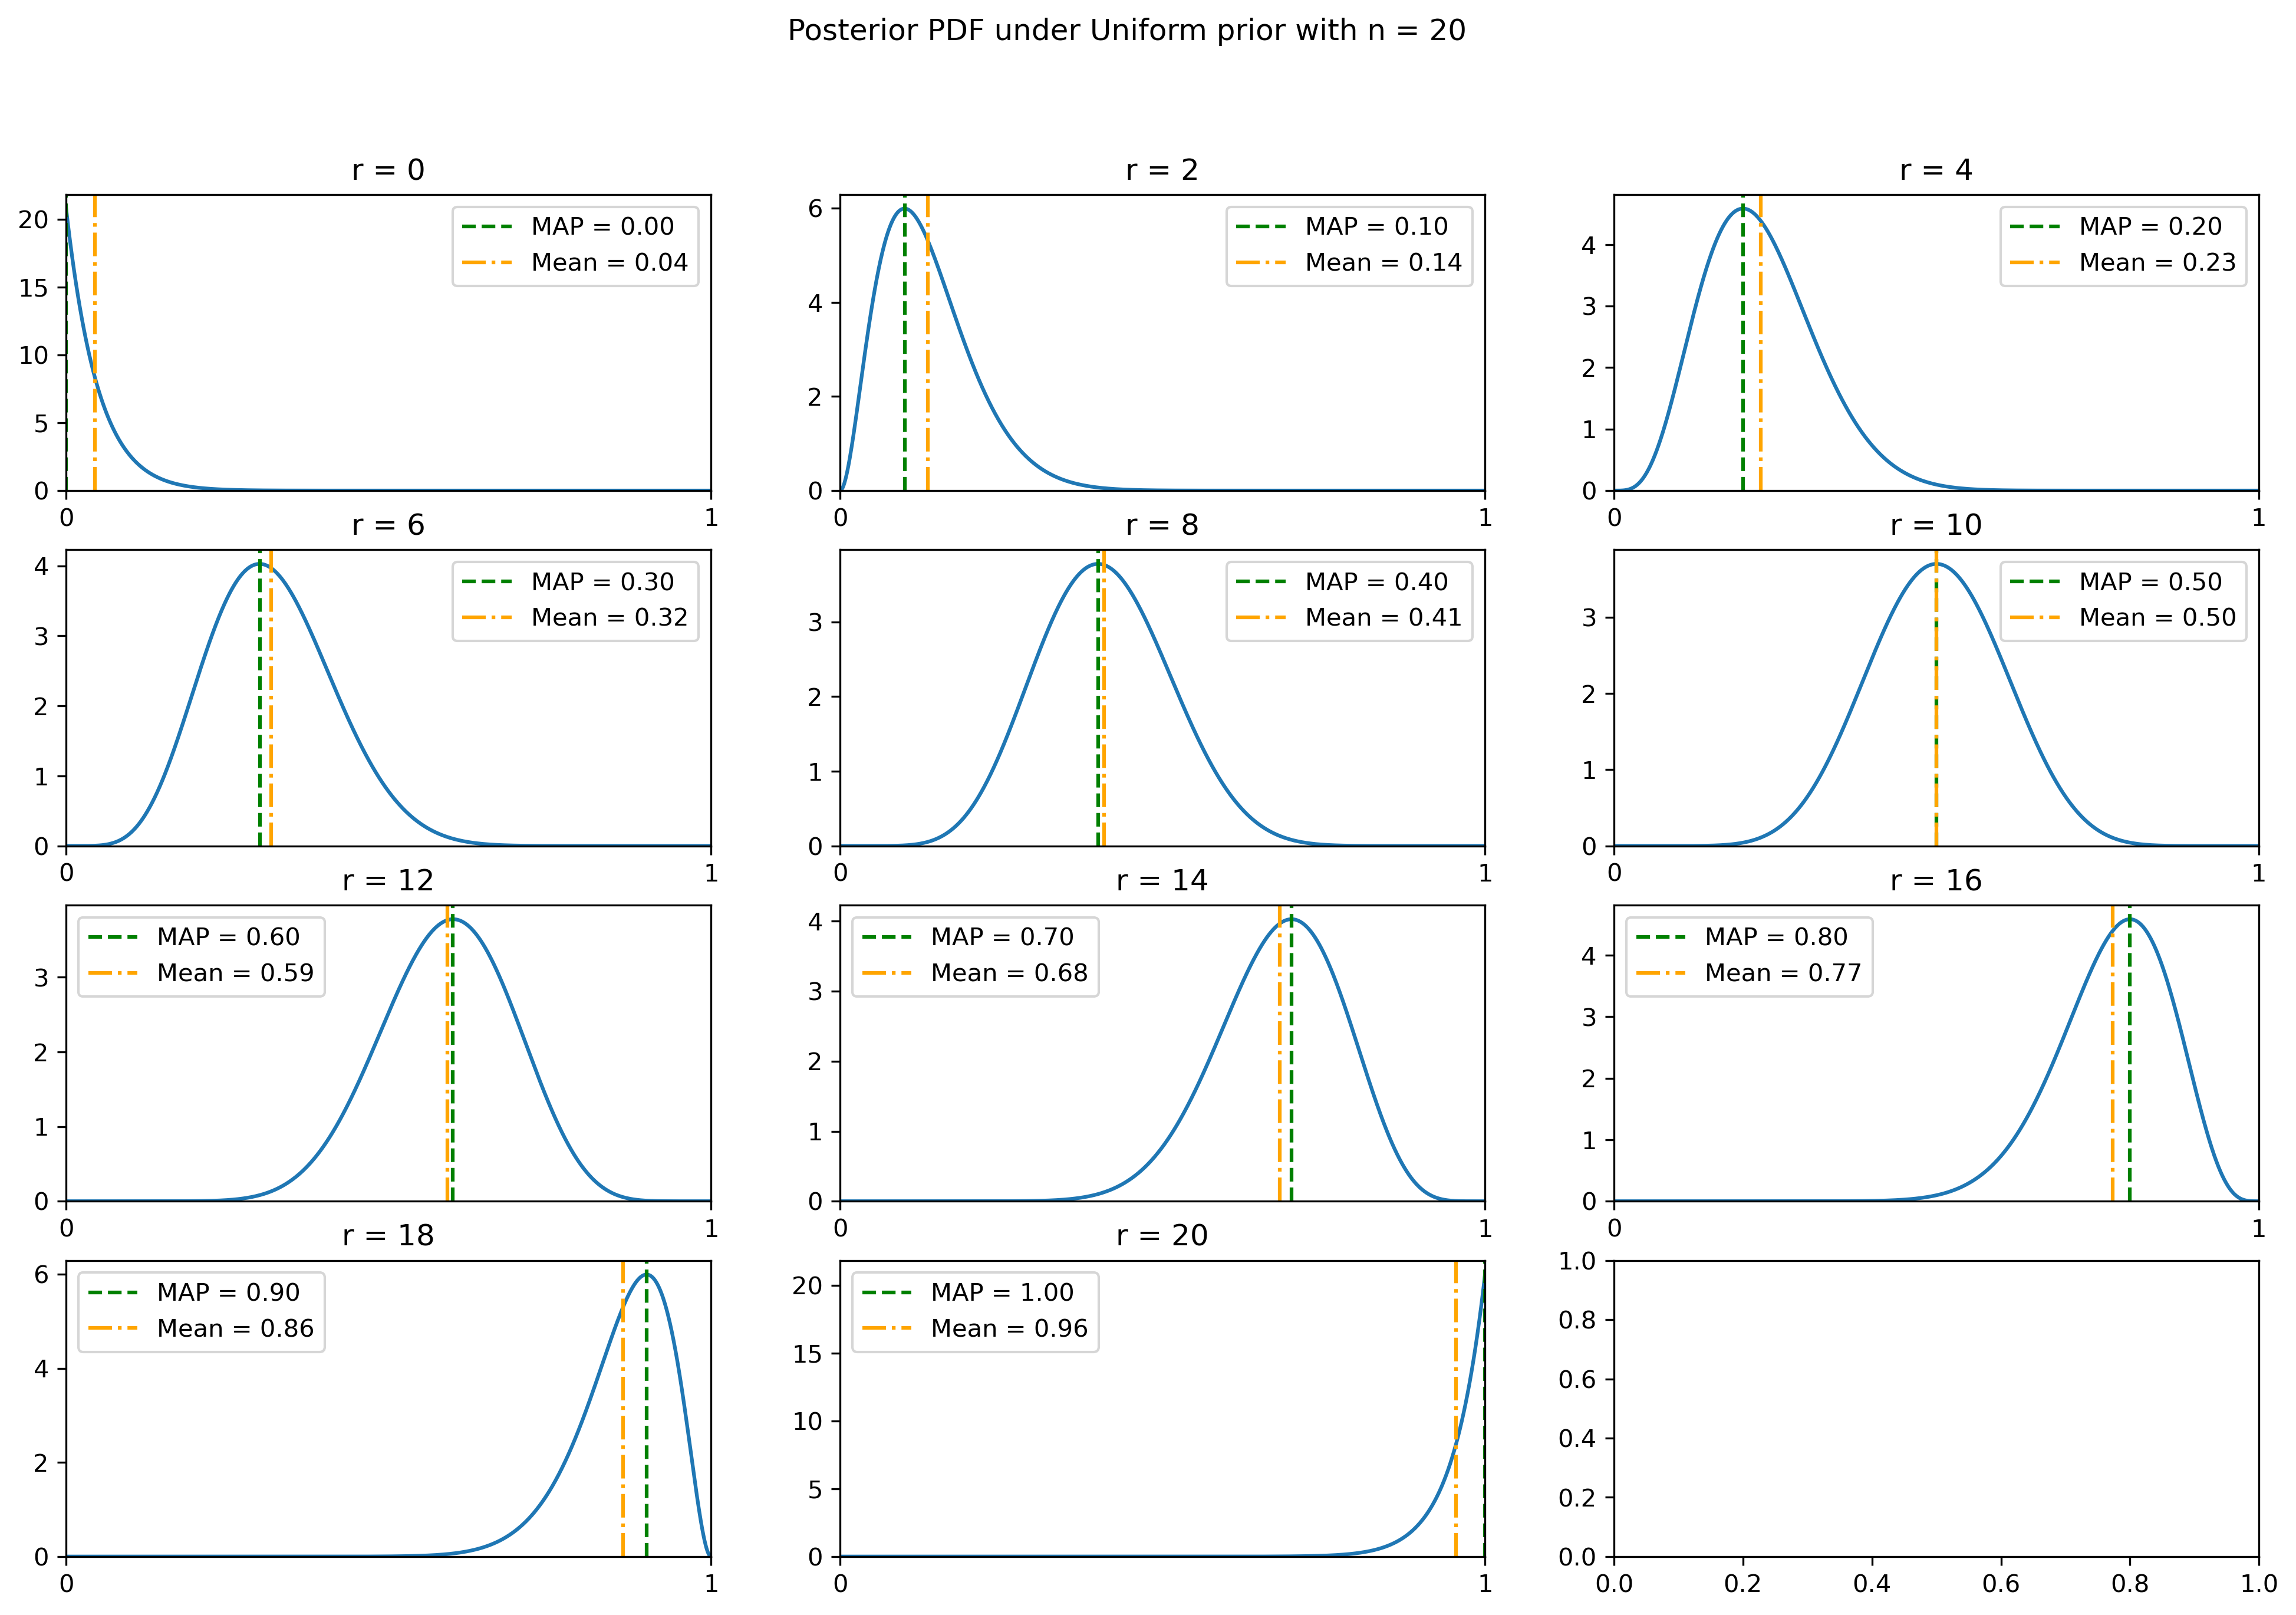

In [156]:
fig,axes = plt.subplots(4,3, figsize = (16,10), dpi = 300)
for i, ax in zip(range(0,len(r)), np.ravel(axes)):
    ax.plot(x, ll[i])
    ax.axvline(x[int(llmax[i])],color = "green",ls ='--',label = f"MAP = %.2f"%x[int(llmax[i])])    
    ax.axvline(llmean[i], color = "orange",ls ='-.',label = f"Mean = %.2f"%llmean[i])    
    
    # ax.plot(x, ll[i])
    
    ax.set_xlim(0,1)
    ax.set_ylim(bottom=0)
    ax.set_xticks([0,1])
    ax.set_title(f"r = %d"%r[i])
    ax.legend()
fig.suptitle("Posterior PDF under Uniform prior with n = "+str(n));

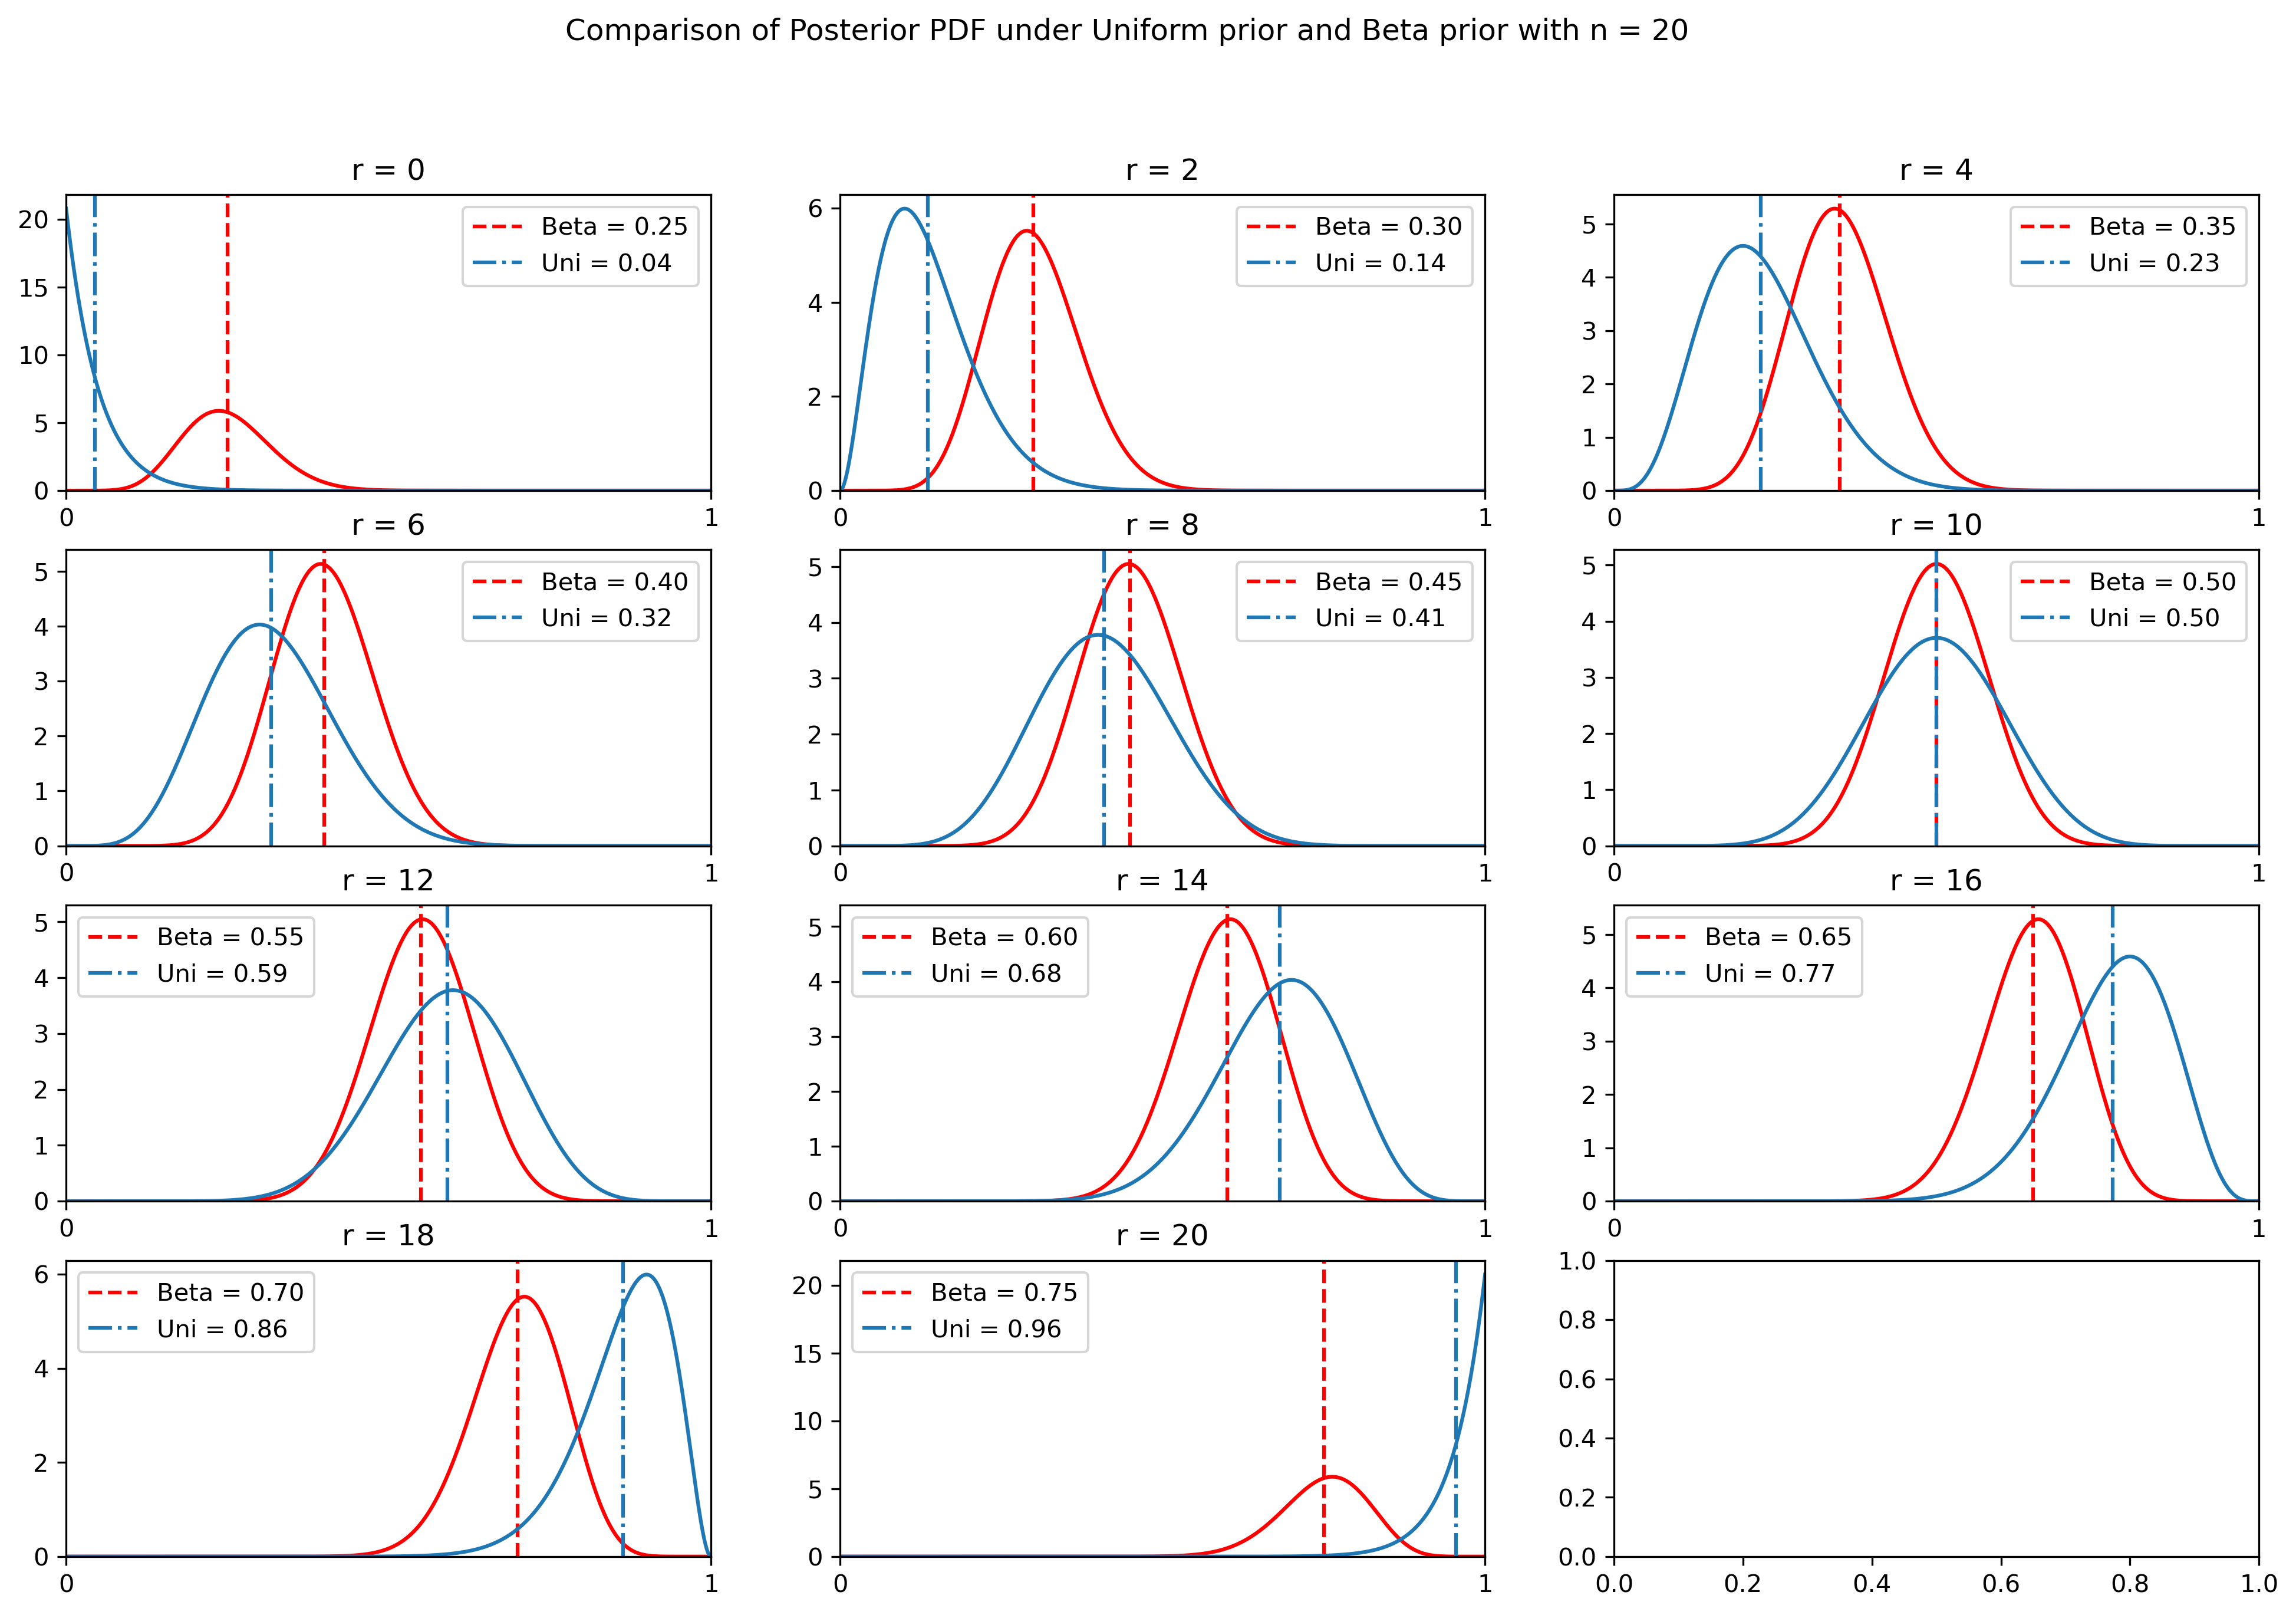

In [153]:
fig,axes = plt.subplots(4,3, figsize = (16,10), dpi = 300)
for i, ax in zip(range(0,len(r)), np.ravel(axes)):
    ax.plot(x, llb[i], color = "red")
    # ax.axvline(x[int(llmax[i])],color = "green",ls ='--',label = f"MAP = %.2f"%x[int(llmax[i])])    
    ax.axvline(llmeanb[i], color = "red",ls ='--',label = f"Beta = %.2f"%llmeanb[i])    
    ax.plot(x, ll[i])
    # ax.axvline(x[int(llmax[i])],color = "green",ls ='--',label = f"MAP = %.2f"%x[int(llmax[i])])    
    ax.axvline(llmean[i],ls ='-.',label = f"Uni = %.2f"%llmean[i])
    # ax.plot(x, ll[i])
    
    ax.set_xlim(0,1)
    ax.set_ylim(bottom=0)
    ax.set_xticks([0,1])
    ax.set_title(f"r = %d"%r[i])
    ax.legend()
fig.suptitle("Comparison of Posterior PDF under Uniform prior and Beta prior with n = "+str(n));

In [160]:
llbeta = np.zeros((len(r),1000))
postbeta = np.zeros((len(r),1000))
meanb = np.zeros(len(r))

# llb = np.zeros((len(r), 1000))
for i in range(0, len(r)):
    llbeta[i] = likelihood(n, x, r[i])
    postbeta[i] = posteriorbeta(n, x, r[i])
    Nb = sum(llbeta[i])/1000
    Npb = sum(postbeta[i])/1000
    # N = sum(ll[i])/1000
    # ll[i] = ll[i]/N
    llbeta[i] = llbeta[i]/Nb
    postbeta[i] = postbeta[i]/Npb
    # print(N)
    # print(sum(ll[i]))
    # llmax[i] = np.where(ll[i] == max(ll[i]))[0]
    # llmean[i] = E(x,ll[i])/1000
    meanb[i] = E(x,postbeta[i])/1000
    
llb[0];
beta = stats.beta
betapdf = beta.pdf(x, 10,10)

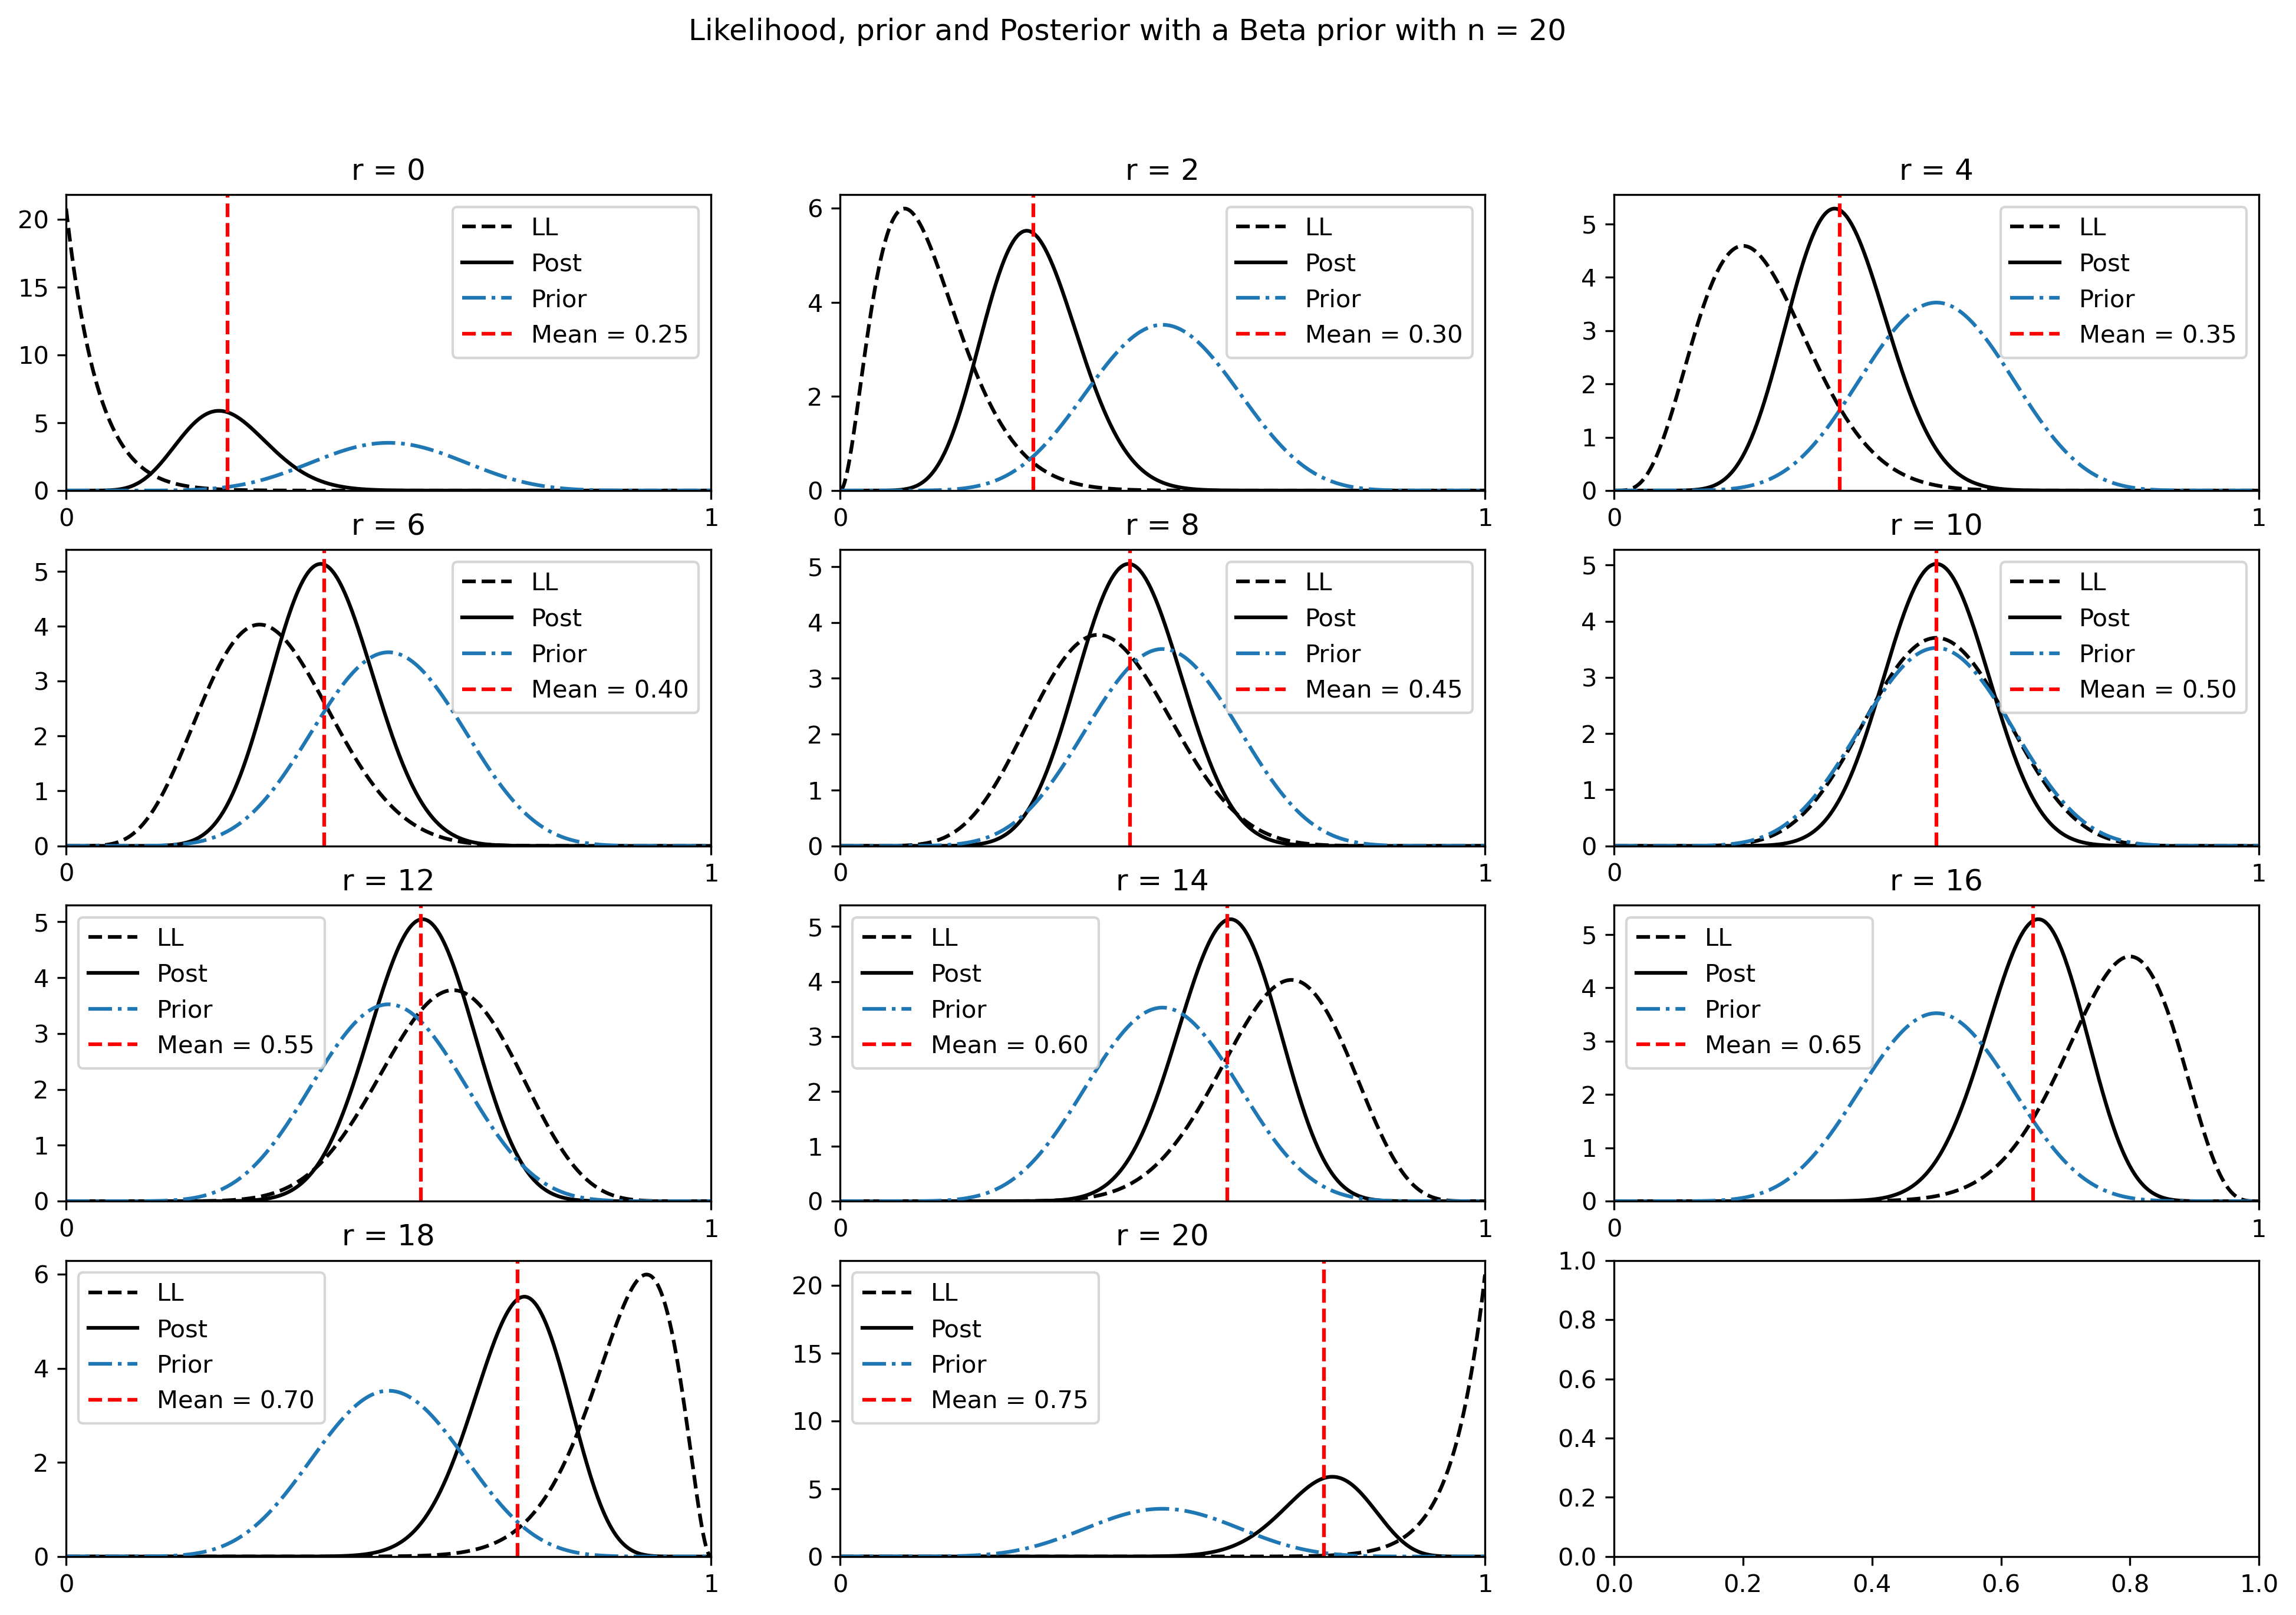

In [172]:
fig,axes = plt.subplots(4,3, figsize = (16,10), dpi = 300)
for i, ax in zip(range(0,len(r)), np.ravel(axes)):
    ax.plot(x, llbeta[i], "k--", label ="LL")
    ax.plot(x, postbeta[i], "k", label ="Post")
    ax.plot(x,betapdf,"-.", label ="Prior")

    # ax.axvline(x[int(llmax[i])],color = "green",ls ='--',label = f"MAP = %.2f"%x[int(llmax[i])])    
    ax.axvline(meanb[i], color = "red",ls ='--',label = f"Mean = %.2f"%llmeanb[i])    
    # ax.plot(x, ll[i])
    # ax.axvline(x[int(llmax[i])],color = "green",ls ='--',label = f"MAP = %.2f"%x[int(llmax[i])])    
    # ax.axvline(llmean[i],ls ='-.',label = f"Uni = %.2f"%llmean[i])
    # ax.plot(x, ll[i])
    
    ax.set_xlim(0,1)
    ax.set_ylim(bottom=0)
    ax.set_xticks([0,1])
    ax.set_title(f"r = %d"%r[i])
    ax.legend()
fig.suptitle("Likelihood, prior and Posterior with a Beta prior with n = "+str(n));

In [199]:
power = np.arange(0,10)[1:]
N = 3*(2**(power-1))
r = 2**power
for i in range(0, len(r)):
    llbeta[i] = likelihood(N[i], x, r[i])
    postbeta[i] = posteriorbeta(N[i], x, r[i])
    Nb = sum(llbeta[i])/1000
    Npb = sum(postbeta[i])/1000
    # N = sum(ll[i])/1000
    # ll[i] = ll[i]/N
    llbeta[i] = llbeta[i]/Nb
    postbeta[i] = postbeta[i]/Npb
    # print(N)
    # print(sum(ll[i]))
    # llmax[i] = np.where(ll[i] == max(ll[i]))[0]
    # llmean[i] = E(x,ll[i])/1000
    meanb[i] = E(x,postbeta[i])/1000
# postbeta[2]

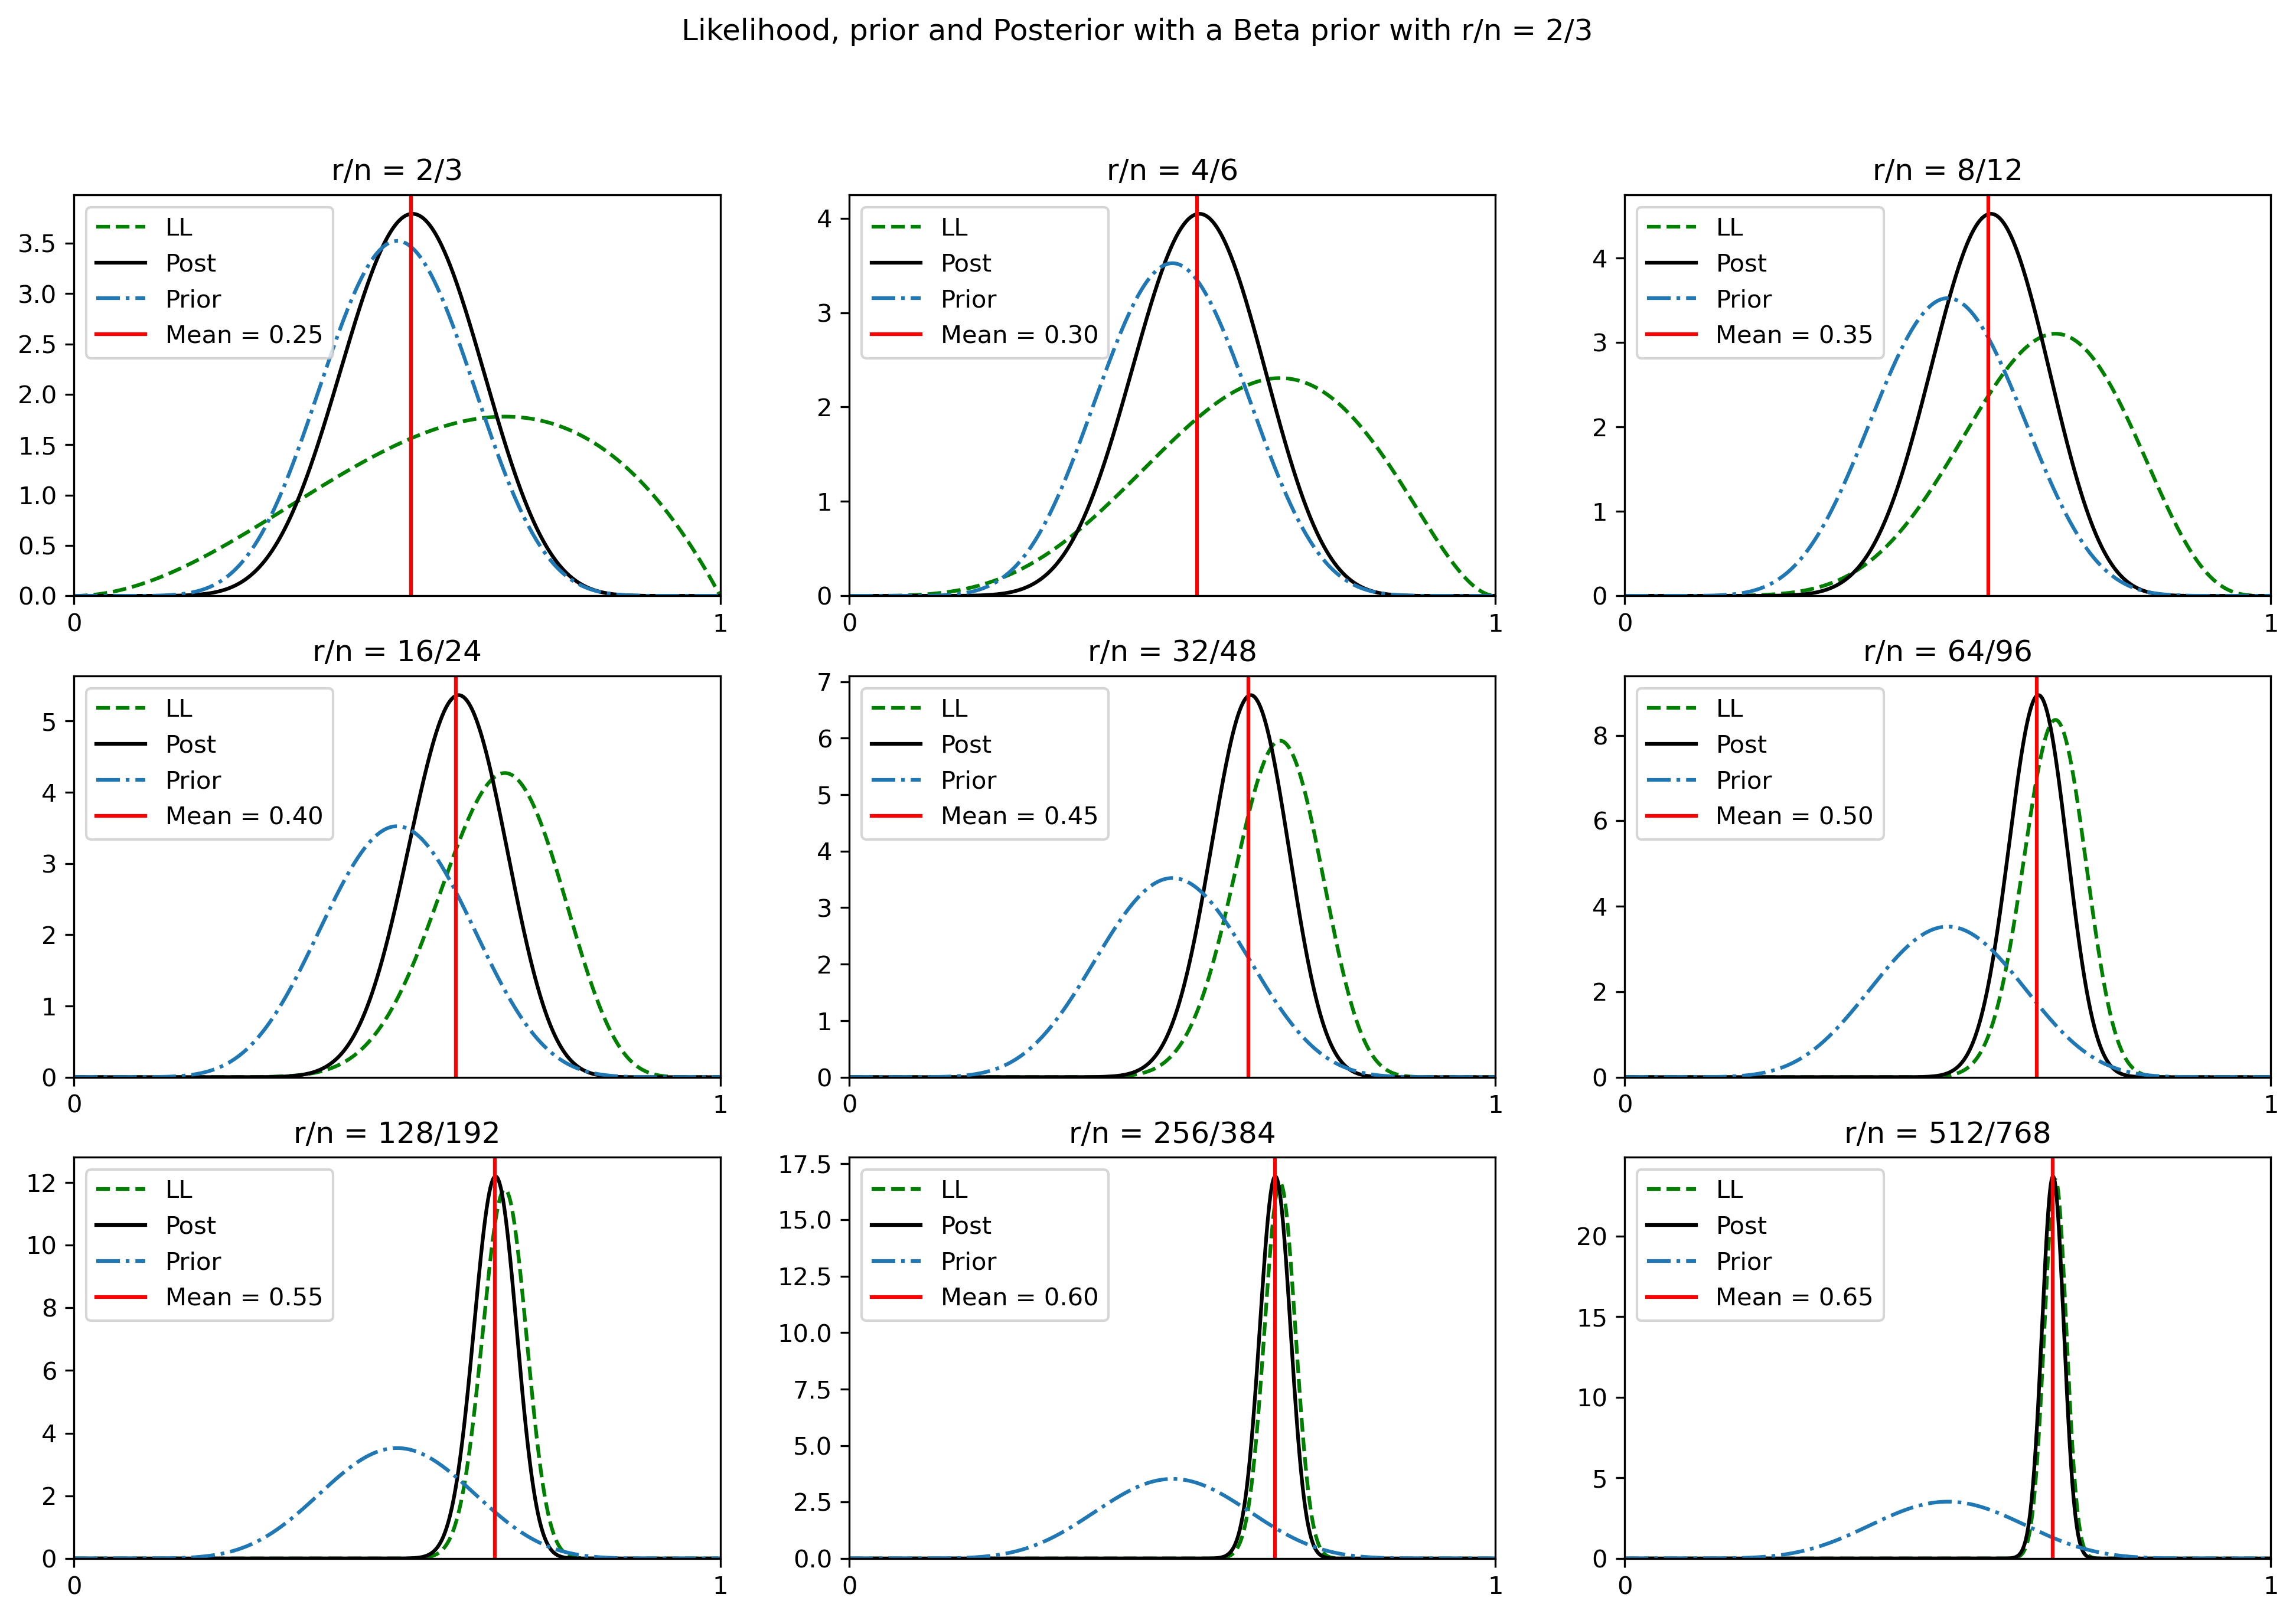

In [201]:
fig,axes = plt.subplots(3,3, figsize = (16,10), dpi = 300)
for i, ax in zip(range(0,len(r)), np.ravel(axes)):
    ax.plot(x, llbeta[i], "g--", label ="LL")
    ax.plot(x, postbeta[i], "k", label ="Post")
    ax.plot(x,betapdf,"-.", label ="Prior")

    # ax.axvline(x[int(llmax[i])],color = "green",ls ='--',label = f"MAP = %.2f"%x[int(llmax[i])])    
    ax.axvline(meanb[i], color = "red",ls ='-',label = f"Mean = %.2f"%llmeanb[i])    
    # ax.plot(x, ll[i])
    # ax.axvline(x[int(llmax[i])],color = "green",ls ='--',label = f"MAP = %.2f"%x[int(llmax[i])])    
    # ax.axvline(llmean[i],ls ='-.',label = f"Uni = %.2f"%llmean[i])
    # ax.plot(x, ll[i])
    
    ax.set_xlim(0,1)
    ax.set_ylim(bottom=0)
    ax.set_xticks([0,1])
    ax.set_title(f"r/n = %d/%d"%(r[i],N[i]))
    ax.legend()
fig.suptitle("Likelihood, prior and Posterior with a Beta prior with r/n = 2/3");

## Exploring the beta pdf lolol

In [ ]:
# simulating data using a bernoulli rv and then using bayesian stats to infer the probability